In [1]:
import pandas as pd
import numpy as np

In [2]:
cd /Users/kunalsharma/Documents/kunalsharma/Data\ science/

/Users/kunalsharma/Documents/kunalsharma/Data science


In [3]:
cd IMBD/

/Users/kunalsharma/Documents/kunalsharma/Data science/IMBD


In [4]:
df = pd.read_csv('title.ratings.tsv',delimiter='\t',encoding='utf-8')
df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.8,1492
1,tt0000002,6.3,181
2,tt0000003,6.6,1132
3,tt0000004,6.4,110
4,tt0000005,6.2,1832


In [5]:
df.describe()

,averageRating,numVotes
count,929294.000000,9.292940e+05
mean,6.915896,9.689791e+02
std,1.398331,1.556367e+04
min,1.000000,5.000000e+00
25%,6.200000,9.000000e+00
50%,7.100000,2.000000e+01
75%,7.900000,7.700000e+01
max,10.000000,2.081289e+06


In [6]:
df.isnull().sum()

tconst           0
averageRating    0
numVotes         0
dtype: int64

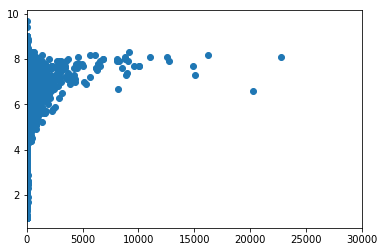

In [8]:
# Restricting to 30,000 numVotes as most of data is in this range.
dfnew = df[:5000]
plt.xlim(0,30000)
plt.scatter(dfnew['numVotes'],dfnew['averageRating'])
plt.show()

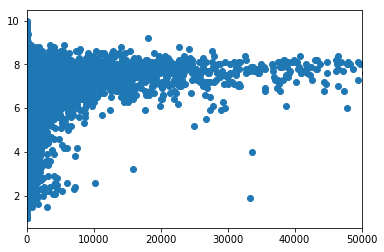

In [9]:
# This however is still too big. So restricting further with original data.
dfnew = df[:50000]
plt.xlim(0,50000)
plt.scatter(dfnew['numVotes'],dfnew['averageRating'])
plt.show()

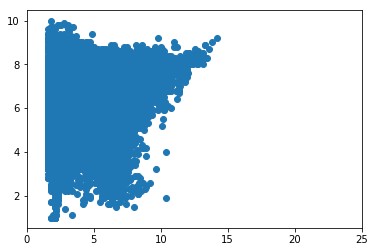

In [10]:
# It's clear that numVotes don't affect the ratings much after a point. 
# As most of the variation is in lower range of numVotes, we consdier scaling. 
import numpy as np
plt.xlim(0,25)
X = np.log(dfnew['numVotes'])
plt.scatter(X,dfnew['averageRating'])
plt.show()

In [11]:
# Statistical description of ratings.

from scipy import stats
stats.describe(df['averageRating'])

DescribeResult(nobs=929294, minmax=(1.0, 10.0), mean=6.915895938206853, variance=1.9553300252996724, skewness=-0.8374756945903573, kurtosis=1.1088950536292277)

In [12]:
for i in range(10000, 90000, 10000):
    df_i = df[:i]
    print(stats.describe(df_i['averageRating']), '\n' )

DescribeResult(nobs=10000, minmax=(1.0, 9.7), mean=6.16222, variance=1.0688355551555153, skewness=-1.0476115688834244, kurtosis=2.6183004392489595) 

DescribeResult(nobs=20000, minmax=(1.0, 9.7), mean=6.263095, variance=0.89936448919946, skewness=-0.9329293532816819, kurtosis=2.5002594945799057) 

DescribeResult(nobs=30000, minmax=(1.0, 9.7), mean=6.328666666666666, variance=0.9255830749913887, skewness=-0.8021420406158806, kurtosis=1.9697428878248582) 

DescribeResult(nobs=40000, minmax=(1.0, 10.0), mean=6.342174999999999, variance=1.0370561957798945, skewness=-0.6936344129151711, kurtosis=1.5373166688016573) 

DescribeResult(nobs=50000, minmax=(1.0, 10.0), mean=6.33022, variance=1.1196291441828836, skewness=-0.6608746180791286, kurtosis=1.1832846872809135) 

DescribeResult(nobs=60000, minmax=(1.0, 10.0), mean=6.327676666666667, variance=1.1653834251793085, skewness=-0.6456091571750502, kurtosis=1.0035967371739316) 

DescribeResult(nobs=70000, minmax=(1.0, 10.0), mean=6.31379285714285

In [13]:
# Let's restrict to range where most ratings lie. 
df_l = df[df['numVotes']< 5000]
stats.describe(df_l['averageRating'])

DescribeResult(nobs=914406, minmax=(1.0, 10.0), mean=6.916885497251769, variance=1.9648649389989485, skewness=-0.8399731618998911, kurtosis=1.1035459391541025)

Remarks based on above: 
1) As the skewness in ratings is negative for pretty much all the ranges of 'numVotes', 
   the distribution is 'left-tailed'. The distribution cannot be Normal. 
2) The Kurtosis values are all in 'negative excess' indicating that the distribution is Platykurtic. 
   This means that there are much less outliers in comparision to normally distributed data. 
   As a result, data is not exhibiting random fluctuations and there is very little noise.

So over all the ratings data by iteslf, if pretty good to do predictive modeling.

In [14]:
df_crew = pd.read_csv('title.crew.tsv', delimiter='\t',encoding='utf-8')

In [15]:
df_crew.replace(r'\s+|\\N', regex=True, inplace=True)
df_crew.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [16]:
# The above didn't work so trying different method.
df_crew = df_crew[df_crew['writers'].map(len) > 2]

In [17]:
df_crew.shape

(2953253, 3)

In [18]:
df1 = pd.merge(df,df_crew, on='tconst')

In [19]:
df_basics = pd.read_csv('title.basics.tsv', delimiter='\t',encoding='utf-8')
df_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [20]:
df_basics = df_basics.drop(columns = ['endYear'])

In [21]:
df_basics = df_basics[df_basics['runtimeMinutes'].map(len) > 2]
df_basics = df_basics[df_basics['startYear'].map(len) > 2]

In [22]:
df_basics = df_basics[df_basics['genres'].map(len) > 2]

The commands were meant to get rid of '\N' from the columns.

In [23]:
# Selecting just movies! 
df_basics = df_basics[df_basics['titleType'] == 'movie']

In [24]:
df2 = pd.merge(df1,df_basics, on='tconst')
df2.head()

,tconst,averageRating,numVotes,directors,writers,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0000679,4.8,33,"nm0091767,nm0877783","nm0000875,nm0877783",movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,120,"Adventure,Fantasy"
1,tt0002101,5.1,386,nm0309130,"nm0765026,nm0309130",movie,Cleopatra,Cleopatra,0,1912,100,"Drama,History"
2,tt0002445,6.2,232,nm0345500,"nm0797197,nm0345500",movie,Quo Vadis?,Quo Vadis?,0,1913,120,"Drama,History"
3,tt0002452,6.8,183,nm0218404,"nm0218404,nm2384492,nm0636620",movie,The Independence of Romania,Independenta Romaniei,0,1912,120,"History,War"
4,tt0002646,6.8,296,nm0088881,"nm1834296,nm0369458,nm2421815",movie,Atlantis,Atlantis,0,1913,121,Drama


In [25]:
df2.shape

(55786, 12)

In [26]:
df3 = df2.drop(['titleType'], axis=1)

In [27]:
df3.shape

(55786, 11)

In [29]:
df3 = df2.drop(['originalTitle'], axis=1)

In [30]:
df3c = df3.copy() # Creating a copy. 

Working with the copy now onwards. 

In [31]:
df3c['primaryTitle'] = df3c['primaryTitle'].apply(lambda x: len(x))

In [32]:
df3c.head()

,tconst,averageRating,numVotes,directors,writers,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0000679,4.8,33,"nm0091767,nm0877783","nm0000875,nm0877783",movie,30,0,1908,120,"Adventure,Fantasy"
1,tt0002101,5.1,386,nm0309130,"nm0765026,nm0309130",movie,9,0,1912,100,"Drama,History"
2,tt0002445,6.2,232,nm0345500,"nm0797197,nm0345500",movie,10,0,1913,120,"Drama,History"
3,tt0002452,6.8,183,nm0218404,"nm0218404,nm2384492,nm0636620",movie,27,0,1912,120,"History,War"
4,tt0002646,6.8,296,nm0088881,"nm1834296,nm0369458,nm2421815",movie,8,0,1913,121,Drama


In [33]:
from scipy import stats
stats.describe(df3['numVotes'])

DescribeResult(nobs=55786, minmax=(5, 2081289), mean=9742.27870791955, variance=3269571096.6061964, skewness=13.365445520813863, kurtosis=262.03412497125794)

In [65] above after removing 'originalTitle', the column 'primaryTitle' is replaced
by Length of the title. This is a simplification made here to get remove non-numerical 
variables as much as possible. 

In [34]:
from sklearn.preprocessing import LabelEncoder 
class_l = LabelEncoder()
y = class_l.fit_transform(df3c['genres'].values)

In [35]:
y

array([240, 623, 623, ..., 590, 590, 590])

Commented out!! 
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count= CountVectorizer()
bag = count.fit_transform(z)

In [ ]:
labels = count.vocabulary_
print(max(labels.values()))

So there are 29 different genres here. A caveat is 'sci' and 'fi' are considered
seperately but we shall not bother about it. 

In [37]:
freq = df3c['genres'].value_counts().to_dict()

In [38]:
df3c['genres'] = df3c['genres'].map(freq)

In [39]:
df3c.head()

,tconst,averageRating,numVotes,directors,writers,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0000679,4.8,33,"nm0091767,nm0877783","nm0000875,nm0877783",movie,30,0,1908,120,45
1,tt0002101,5.1,386,nm0309130,"nm0765026,nm0309130",movie,9,0,1912,100,452
2,tt0002445,6.2,232,nm0345500,"nm0797197,nm0345500",movie,10,0,1913,120,452
3,tt0002452,6.8,183,nm0218404,"nm0218404,nm2384492,nm0636620",movie,27,0,1912,120,15
4,tt0002646,6.8,296,nm0088881,"nm1834296,nm0369458,nm2421815",movie,8,0,1913,121,12079


In [40]:
df3c['genres'].describe()

count    55786.000000
mean      3421.837271
std       4690.660470
min          1.000000
25%        177.000000
50%        755.000000
75%       4135.000000
max      12079.000000
Name: genres, dtype: float64

In [41]:
df3c = df3c.drop(columns=['titleType'])

In [60]:
df3.shape

(55786, 11)

# Drop 'isAdult' column as it is incorporated in 'genres'

In [42]:
df3c = df3c.drop(columns=['isAdult'])

# Convert years from string to integer

In [44]:
df3c['startYear'] = df3c['startYear'].map(lambda s: int(s)) 

In [45]:
df3c['startYear'].describe()

count    55786.000000
mean      1994.280734
std         22.225302
min       1908.000000
25%       1980.000000
50%       2002.000000
75%       2012.000000
max       2019.000000
Name: startYear, dtype: float64

In [46]:
dirs = df3c['directors'].value_counts().to_dict()

# Collect the directors labels who have directed just one movie. 

In [47]:
low_c = [x for x,v in dirs.items() if v < 2]

In [48]:
len(low_c) # Total number of directors with only one movie! 

18013

In [49]:
df3c.shape

(55786, 9)

Drop the movies with directors who have directed only 
one movie as this doesn't help in prediction. 

In [50]:
df3c = df3c[~df3c['directors'].isin(low_c)]

In [51]:
df3c.shape

(37773, 9)

In [ ]:
df3c.head()

In [52]:
cols = list(df3c.columns)

Collecting numeric features

In [53]:
num = cols.remove('directors')

In [54]:
cols.remove('tconst')
cols.remove('writers')

In [61]:
cols

['averageRating',
 'numVotes',
 'primaryTitle',
 'startYear',
 'runtimeMinutes',
 'genres']

In [55]:
df3c[cols].dtypes

averageRating     float64
numVotes            int64
primaryTitle        int64
startYear           int64
runtimeMinutes     object
genres              int64
dtype: object

In [56]:
df3c['runtimeMinutes'] = df3c['runtimeMinutes'].map(lambda s: int(s))

In [57]:
len([x for x,v in dirs.items() if v < 10])

25973

In [ ]:
df3c[cols].dtypes

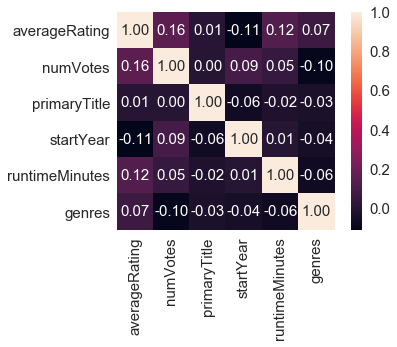

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
cm = np.corrcoef(df3c[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,
                xticklabels=cols) 

(array([2.5809e+04, 6.7400e+02, 1.5100e+02, 3.6000e+01, 8.0000e+00,
        5.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 1. ,  8.9, 16.8, 24.7, 32.6, 40.5, 48.4, 56.3, 64.2, 72.1, 80. ]),
 <a list of 10 Patch objects>)

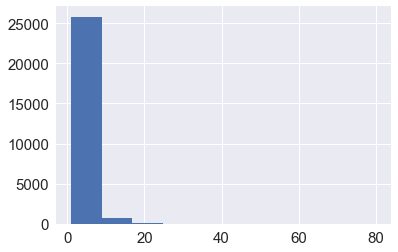

In [66]:
plt.hist(dirs.values(),bins=10)

In [ ]:
df3c[cols].dtypes

In [59]:
len([x for x,v in dirs.items() if v < 10])

25973

In [62]:
df3c = df3c.drop(['primaryTitle'], axis=1)

In [63]:
df3c.head()

,tconst,averageRating,numVotes,directors,writers,startYear,runtimeMinutes,genres
2,tt0002445,6.2,232,nm0345500,"nm0797197,nm0345500",1913,120,452
5,tt0002898,6.9,82,nm0135052,"nm0135052,nm0957652",1913,150,12079
6,tt0003159,5.7,21,nm0135052,"nm0135053,nm0401076",1913,300,12079
10,tt0003816,5.2,9,nm0877783,"nm0049995,nm0120272,nm0206755,nm0245385",1914,100,12079
11,tt0003883,7.7,264,nm0674600,nm0674600,1913,100,907


In [67]:
df3c['directors']=df3c['directors'].map(dirs)

# In above, directors are replaced by their frequency count

In [70]:
df3c.head()

,tconst,averageRating,numVotes,directors,writers,startYear,runtimeMinutes,genres
2,tt0002445,6.2,232,3,"nm0797197,nm0345500",1913,120,452
5,tt0002898,6.9,82,5,"nm0135052,nm0957652",1913,150,12079
6,tt0003159,5.7,21,5,"nm0135053,nm0401076",1913,300,12079
10,tt0003816,5.2,9,2,"nm0049995,nm0120272,nm0206755,nm0245385",1914,100,12079
11,tt0003883,7.7,264,3,nm0674600,1913,100,907


In [71]:
writ = df3c['writers'].value_counts().to_dict()

In [73]:
len(writ.values())

30253

In [75]:
df3c = df3c.drop(['writers'], axis=1)

In [76]:
df3c.head()

,tconst,averageRating,numVotes,directors,startYear,runtimeMinutes,genres
2,tt0002445,6.2,232,3,1913,120,452
5,tt0002898,6.9,82,5,1913,150,12079
6,tt0003159,5.7,21,5,1913,300,12079
10,tt0003816,5.2,9,2,1914,100,12079
11,tt0003883,7.7,264,3,1913,100,907


Split the data set into test and train 

In [99]:
X = df3c[['tconst','numVotes','directors','startYear','runtimeMinutes','genres']]
Y = df3c[['tconst','averageRating']]

In [100]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=1)

In [101]:
x_train.head()

,tconst,numVotes,directors,startYear,runtimeMinutes,genres
2261,tt0042634,584,20,1950,101,1273
26599,tt0350193,5831,7,2003,109,2620
22769,tt0252543,30,6,1979,164,202
6066,tt0062748,11,8,1968,136,211
26926,tt0361796,62,5,1990,223,914


In [102]:
df_train = pd.merge(x_train,y_train)

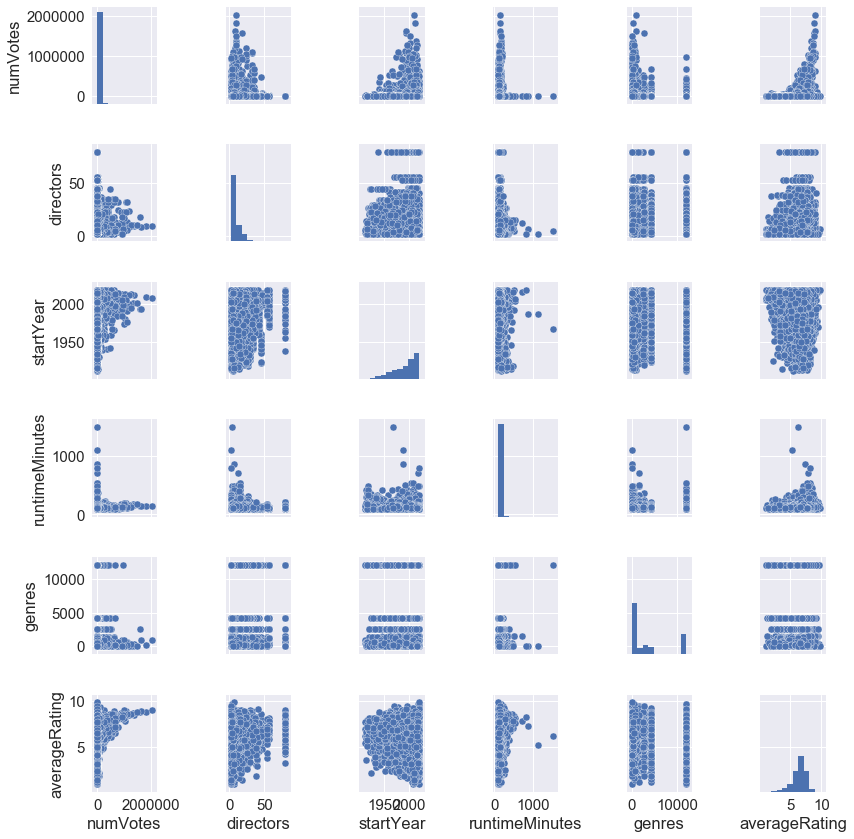

In [103]:
import seaborn as sns
sns.pairplot(df_train,size=2.0)
plt.tight_layout()
plt.show()

1)Noting the last row, except for numVotes there is no clear relationship between
target variable and features.
2) Other observation is that numVotes are concentrated for certain directors. 
3) The previous remark is true for genres as well. 

Below we start modeling first with multiple regression. 

In [108]:
x_tr = x_train[['numVotes','directors','startYear','runtimeMinutes','genres']]
y_tr = y_train['averageRating']

In [110]:
y_tr.describe()

count    26441.000000
mean         6.455304
std          1.059567
min          1.000000
25%          5.900000
50%          6.600000
75%          7.200000
max          9.800000
Name: averageRating, dtype: float64

In [112]:
x_tr.dtypes

numVotes          int64
directors         int64
startYear         int64
runtimeMinutes    int64
genres            int64
dtype: object

In [113]:
import statsmodels.api as sm
from scipy import stats
## Fit and summary:
model = sm.OLS(y_tr,x_tr.astype(float)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 2.034e+05
Date:                Sun, 19 May 2019   Prob (F-statistic):               0.00
Time:                        20:51:17   Log-Likelihood:                -38587.
No. Observations:               26441   AIC:                         7.718e+04
Df Residuals:                   26436   BIC:                         7.722e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
numVotes        2.395e-06   9.69e-08     24.

Remarks: 
    1) Jarque-Bera is too large, confirming non-normality. 
    2) numVotes and generes play strong roles, indicated by their coef

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
alphas = [0.0001, 0.001, 0.01, 1, 5, 10, 20, 100,500,1000,5000,10000]
tuning = [{'alpha':alphas}]
ridge = Ridge()
gso = GridSearchCV(ridge,param_grid=tuning,cv=10,scoring='neg_mean_squared_error')
gso.fit(x_tr,y_tr)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': [0.0001, 0.001, 0.01, 1, 5, 10, 20, 100, 500, 1000, 5000, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [115]:
gso.best_estimator_

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [117]:
print('best training score', np.sqrt(-gso.best_score_))

best training score 1.0261079709941745


In [119]:
y_test.head()

,tconst,averageRating
40765,tt2071500,5.2
46435,tt3702720,5.4
47188,tt3982436,6.6
16351,tt0119441,5.6
33197,tt1035732,5.6


In [120]:
y_ts = y_test['averageRating']

In [123]:
y_ts = pd.DataFrame(y_ts)

In [127]:
x_ts = x_test[['numVotes','directors','startYear','runtimeMinutes','genres']]

In [128]:
best_ridge = gso.best_estimator_
best_ridge.fit(x_tr,y_tr)
print("Training accuracy", best_ridge.score(x_tr, y_tr))
print("Test accuracy", best_ridge.score(x_ts,y_ts)) 

Training accuracy 0.06301602647561022
Test accuracy 0.06792677418255


In [129]:
ridge_pred = best_ridge.predict(x_ts)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse_ridge = mean_squared_error(y_ts,ridge_pred)
print("Test mse for ridge", np.sqrt(mse_ridge))

Test mse for ridge 1.0301185563579625


In [130]:
from sklearn.metrics import r2_score
train_pred= best_ridge.predict(x_tr)
print("Ridge R2 score training", r2_score(y_tr,train_pred))
print("Ridge R2 score test:", r2_score(y_ts,ridge_pred))

Ridge R2 score training 0.06301602647561022
Ridge R2 score test: 0.06792677418255


So the above tests clearly indicate non-linearity of the data. 
Therefore we switch to other models. 

In [131]:
#Trying random forests

from sklearn.ensemble import RandomForestRegressor
rforest = RandomForestRegressor(n_estimators=1000,criterion='mse',random_state=1,n_jobs=1)

In [133]:
rforest.fit(x_tr,y_tr)
y_train_pred = rforest.predict(x_tr)
y_test_pred = rforest.predict(x_ts)

In [134]:
print('MSE for random forest train: %.3f, test: %.3f'% (mean_squared_error(y_tr,y_train_pred),
                                                 mean_squared_error(y_ts,y_test_pred)))

MSE for random forest train: 0.127, test: 0.945


In [135]:
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_tr,y_train_pred), r2_score(y_ts,y_test_pred)))

R^2 train: 0.887, test: 0.170


Clearly Random forest is overfitting the data and low test R^2 indicates weak realtionship.
However this is much better than results that were obtained from Ridge regression.

As it is showing a pattern, this supports the intuition that data is non linear. 

Trying boositng now. 

In [142]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2,n_estimators=120)
gbrt.fit(x_tr,y_tr)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=120, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [143]:
errors = [mean_squared_error(y_ts,y_pred) for y_pred in gbrt.staged_predict(x_ts)]
bst_n = np.argmin(errors)

In [144]:
gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n)
gbrt_best.fit(x_tr,y_tr)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=119, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [145]:
y_ts_best = gbrt_best.predict(x_ts)

In [146]:
print('Mean squared error test:', mean_squared_error(y_ts, y_ts_best))

Mean squared error test: 0.9474101315226086


In [150]:
y_tr_best = gbrt_best.predict(x_tr)
print('Mean squared error train:', mean_squared_error(y_tr, y_tr_best))

Mean squared error train: 0.9232997530025202


In [148]:
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_tr,y_tr_best), r2_score(y_ts,y_ts_best)))

R^2 train: 0.178, test: 0.168


Here as the data is non-linear, R^2 should not be overly relied on. 
Therefore we got with MSE, which is consistent with training and test data. 

#As MSE is approximately 1, our predictions are off by at most 1 rating. 

In [ ]:
# Now delete rows with column values in low_c
#df3c = df3c[df3c['directors'] not in low_c]
#for d in low_c:
#    df3cc = df3cc.drop(df3cc[df3cc['directors']==d].index, inplace=True)